In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import itertools

from genepy import terra
from genepy.utils import helper as h
from genepy.google import gcp
from genepy import rna
from genepy.utils import plot
from genepy.rna import pyDESeq2

from taigapy import TaigaClient
import dalmatian as dm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import networkx as nx

import gseapy

import matplotlib.pyplot as plt
from bokeh.plotting import *
from bokeh.models import HoverTool
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
tc = TaigaClient()
output_notebook()

Loading BokehJS ...

In [1]:
#Experiment outline: MONOMAC1 cell line, simultaneous RNP knockout of MEF2D and MEF2C  followed by RNAseq at 48 and 72 hours. 
project = "RNP_MEIS1"
version = "v1"

## Running on Terra

In [16]:
terra.uploadFromFolder('amlproject','RNA/'+project+"/",
                       'broad-firecloud-ccle/hg38_RNAseq',samplesetname=project,
                      fformat="fastqR1R2", sep='_R1|_R2', test=False)

please be sure you gave access to your terra email account access to this bucket


/home/jeremie/.local/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/home/jeremie/.local/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accoun

['RNA/RNP_MEIS1/mr351-MV411-DMSO-r1_R1_001.fastq.gz', 'RNA/RNP_MEIS1/mr351-MV411-DMSO-r1_R2_001.fastq.gz', 'RNA/RNP_MEIS1/mr352-MV411-DMSO-r2_R1_001.fastq.gz', 'RNA/RNP_MEIS1/mr352-MV411-DMSO-r2_R2_001.fastq.gz', 'RNA/RNP_MEIS1/mr353-MV411-DMSO-r3_R1_001.fastq.gz', 'RNA/RNP_MEIS1/mr353-MV411-DMSO-r3_R2_001.fastq.gz', 'RNA/RNP_MEIS1/mr354-MV411-DMSO-r4_R1_001.fastq.gz', 'RNA/RNP_MEIS1/mr354-MV411-DMSO-r4_R2_001.fastq.gz', 'RNA/RNP_MEIS1/mr355-MV411-72h_MEIS1-r1_R1_001.fastq.gz', 'RNA/RNP_MEIS1/mr355-MV411-72h_MEIS1-r1_R2_001.fastq.gz', 'RNA/RNP_MEIS1/mr356-MV411-72h_MEIS1-r2_R1_001.fastq.gz', 'RNA/RNP_MEIS1/mr356-MV411-72h_MEIS1-r2_R2_001.fastq.gz', 'RNA/RNP_MEIS1/mr357-MV411-72h_MEIS1-r3_R1_001.fastq.gz', 'RNA/RNP_MEIS1/mr357-MV411-72h_MEIS1-r3_R2_001.fastq.gz', 'RNA/RNP_MEIS1/mr358-MV411-72h_MEIS1-r4_R1_001.fastq.gz', 'RNA/RNP_MEIS1/mr358-MV411-72h_MEIS1-r4_R2_001.fastq.gz']


/home/jeremie/.local/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Successfully imported 8 participants.


/home/jeremie/.local/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/home/jeremie/.local/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accoun

Successfully imported 8 samples.
Successfully imported 1 sample sets:
  * RNP_MEIS1 (8 samples)


,fastq1,fastq2,Source,participant
sample_id,,,,
mr351-MV411-DMSO-r1,gs://amlproject/RNA/RNP_MEIS1/mr351-MV411-DMSO...,gs://amlproject/RNA/RNP_MEIS1/mr351-MV411-DMSO...,U,mr351-MV411-DMSO-r1
mr352-MV411-DMSO-r2,gs://amlproject/RNA/RNP_MEIS1/mr352-MV411-DMSO...,gs://amlproject/RNA/RNP_MEIS1/mr352-MV411-DMSO...,U,mr352-MV411-DMSO-r2
mr353-MV411-DMSO-r3,gs://amlproject/RNA/RNP_MEIS1/mr353-MV411-DMSO...,gs://amlproject/RNA/RNP_MEIS1/mr353-MV411-DMSO...,U,mr353-MV411-DMSO-r3
mr354-MV411-DMSO-r4,gs://amlproject/RNA/RNP_MEIS1/mr354-MV411-DMSO...,gs://amlproject/RNA/RNP_MEIS1/mr354-MV411-DMSO...,U,mr354-MV411-DMSO-r4
mr355-MV411-72h_MEIS1-r1,gs://amlproject/RNA/RNP_MEIS1/mr355-MV411-72h_...,gs://amlproject/RNA/RNP_MEIS1/mr355-MV411-72h_...,U,mr355-MV411-72h_MEIS1-r1
mr356-MV411-72h_MEIS1-r2,gs://amlproject/RNA/RNP_MEIS1/mr356-MV411-72h_...,gs://amlproject/RNA/RNP_MEIS1/mr356-MV411-72h_...,U,mr356-MV411-72h_MEIS1-r2
mr357-MV411-72h_MEIS1-r3,gs://amlproject/RNA/RNP_MEIS1/mr357-MV411-72h_...,gs://amlproject/RNA/RNP_MEIS1/mr357-MV411-72h_...,U,mr357-MV411-72h_MEIS1-r3
mr358-MV411-72h_MEIS1-r4,gs://amlproject/RNA/RNP_MEIS1/mr358-MV411-72h_...,gs://amlproject/RNA/RNP_MEIS1/mr358-MV411-72h_...,U,mr358-MV411-72h_MEIS1-r4


In [17]:
wm = dm.WorkspaceManager('broad-firecloud-ccle/hg38_RNAseq')

In [20]:
submission_id = wm.create_submission("star_v1-0_BETA_cfg", project, 'sample_set',expression='this.samples')
terra.waitForSubmission('broad-firecloud-ccle/hg38_RNAseq', submission_id)

Successfully created submission 667936e7-6708-493e-a81e-d4f8436a4cb5.
1.0 of jobs Succeeded in submission 0.sion 0. 264 mn elapsed.


[]

In [22]:
submission_id = wm.create_submission("rsem_v1-0_BETA_cfg", project, 'sample_set', expression = 'this.samples')
terra.waitForSubmission('broad-firecloud-ccle/hg38_RNAseq', submission_id)

Successfully created submission 31db4fc9-ab00-4fb9-a3f8-d2a92b9512ef.
1.0 of jobs Succeeded in submission 0.sion 0. 156 mn elapsed.


[]

In [23]:
submission_id = wm.create_submission("rsem_aggregate_results_v1-0_BETA_cfg", project)
terra.waitForSubmission('broad-firecloud-ccle/hg38_RNAseq', submission_id)

Successfully created submission 0746d322-c3bf-4821-be13-1bd38362603d.
1.0 of jobs Succeeded in submission 0.sion 0. 6 mn elapsed.


[]

In [24]:
results = wm.get_sample_sets().loc[project]
rsem_genes_expected_count = results['rsem_genes_expected_count']

## Loading

In [25]:
mkdir ../data/$project

In [26]:
! gsutil cp $rsem_genes_expected_count ../data/$project/

Copying gs://fc-secure-163bcce1-14a1-4cc2-b8f8-ec8bcbabe2da/0746d322-c3bf-4821-be13-1bd38362603d/rsem_aggregate_results_workflow/800da635-7e6e-4d8e-be05-5c5bcc322710/call-rsem_aggregate_results/RNP_MEIS1.rsem_genes_expected_count.txt.gz...
/ [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      


In [27]:
file = '../data/'+project+'/'+rsem_genes_expected_count.split('/')[-1]

In [28]:
! gunzip $file

In [29]:
rsem_genes_expected_count = pd.read_csv(file[:-3], sep='\t')

In [30]:
data = rsem_genes_expected_count.drop("transcript_id(s)", 1).set_index('gene_id')

In [31]:
data.index = rna.convertGenes(data.index)[0]

you need access to taiga for this (https://pypi.org/project/taigapy/)
Taiga needs to convert data before we can fetch it.  Waiting...

Status: Running conversion
Status: Uploading converted file to S3


[##################]100% | 108.2 MiB/s |  14.9 MiB /  14.9 MiB | Time:  0:00:00
<ipython-input-31-8841b2cca400>:1: DtypeWarning: Columns (32,34,38,40,50) have mixed types.Specify dtype option on import or set low_memory=False.
  data.index = rna.convertGenes(data.index)[0]


19441 could not be parsed... we don't have all genes already


## post processing and filtering

filter some more

In [32]:
minvar = 0
minmean = 0

In [33]:
toremove = np.argwhere(data.values.var(1)<=minvar)
data = data.drop(data.iloc[toremove.ravel()].index,0)
toremove.ravel()

array([    0,     1,    13, ..., 58716, 58718, 58719])

In [34]:
toremove = np.argwhere(data.values.mean(1)<=minmean)
data = data.drop(data.iloc[toremove.ravel()].index,0)
toremove.ravel()

array([], dtype=int64)

In [35]:
data.shape

(27238, 8)

## renaming of columns

In [ ]:
rename = {'MEF2D':'MEF2D_RNP', 'MEF2C':'MEF2C_RNP'}
data.rename(columns=rename, inplace=True)

## Correlation analysis across replicates

In [44]:
a = data.columns.tolist()
a.sort()
data =data[a]

I would like to spend a bit of time looking at this matrix, we can see that it contains a lot of weird things and adding the additionals did not help decipher it to me. 

We have a set of samples IRF2BP2 r4, MYCs r4,5,6, RUNX1s r7,8,9, SPI1 R4,r7 are all very different from their replicates or the rest of the experiment but ccan be closer to some unrelated experiments.

We can not as well the difference in the AAVS1s and a strange pattern showing likely misslabeling in AAVS1 r7.

In [45]:
!mkdir ../results/$project/
!mkdir ../results/$project/plots_$version/

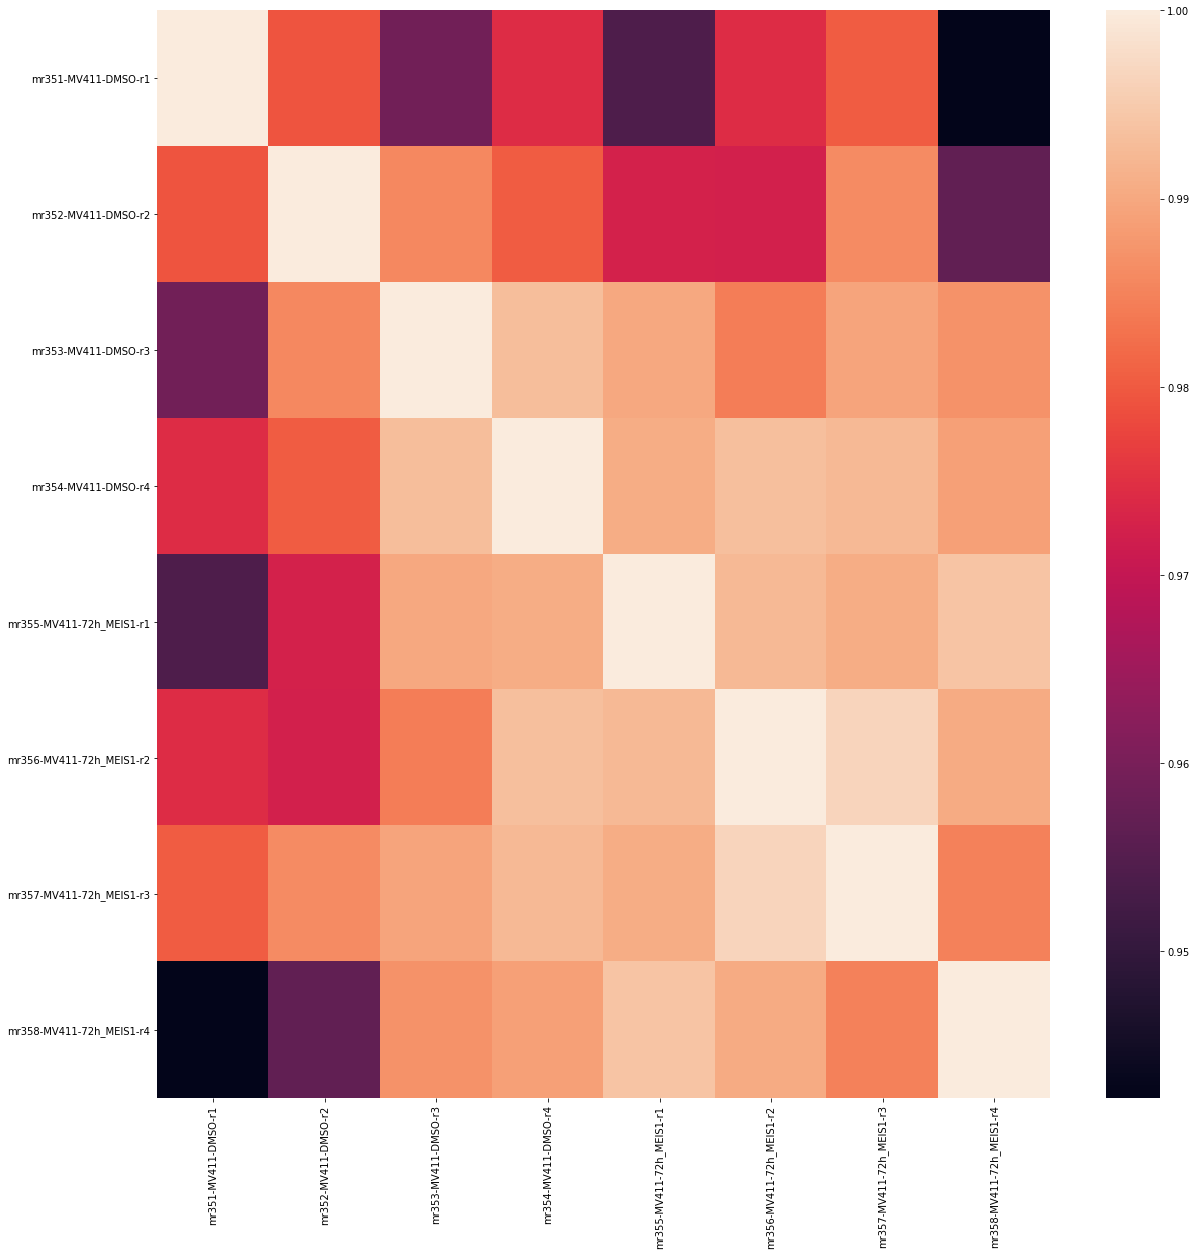

In [46]:
%matplotlib inline
ig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), 
            xticklabels=data.columns,
            yticklabels=data.columns, ax=ax)
plt.savefig('../results/'+project+'/plots_'+version+'/correlation.pdf')

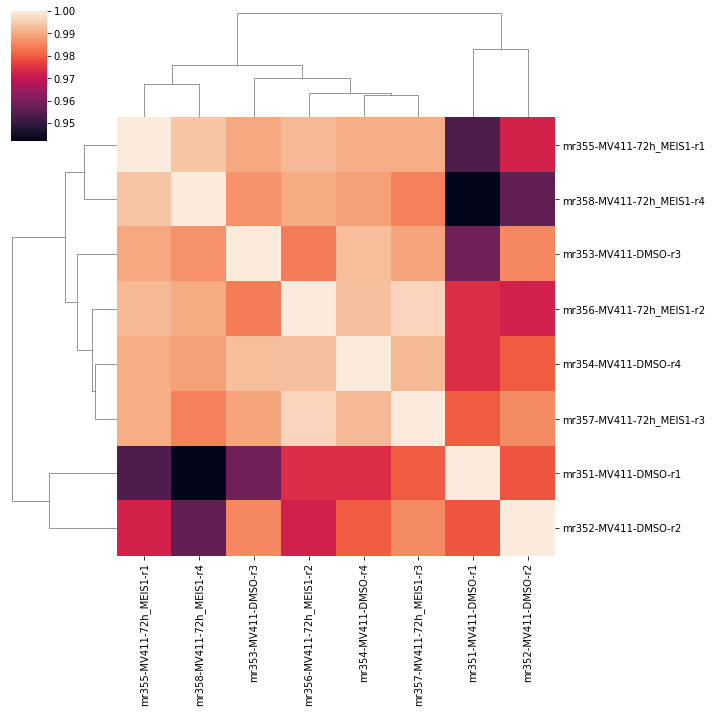

In [47]:
sns.clustermap(data.corr(), 
            xticklabels=data.columns,
            yticklabels=data.columns)

In [48]:
data.to_csv('../results/'+project+'/'+version+'_counts.csv')

In [58]:
version = 'v1'

In [4]:
data = pd.read_csv('../results/'+project+'/'+version+'_counts.csv',index_col=0)

## We are looking for bias in the data and the replicates

In [49]:
col = {v:i for i, v in enumerate(set([i.split('-')[2] for i in data.columns[:-1]]))}

In [50]:
col

{'DMSO': 0, '72h_MEIS1': 1}

In [197]:
data = data[[i for i in data.columns if i.split('-')[0] not in  ["mr334", "mr342", "mr338", "mr329","mr337"]]]

In [53]:
red = PCA(2).fit_transform(data.T)
plot.scatter(red, labels=data.columns, title="PCA plot across replicates", radi=60000, colors=[col[i.split('-')[2]] for i in data.columns], folder= "../results/"+project+"/plots_"+version+"/", showlabels=True)

/home/jeremie/.local/lib/python3.8/site-packages/bokeh/io/saving.py:125: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/home/jeremie/.local/lib/python3.8/site-packages/bokeh/io/saving.py:138: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


Figure(id='1246', ...)

mr129-MYC-r4 seems weird

## Differential expression analysis

In [26]:
experiments = list(set([i.split('-')[2] for i in data.columns[:-1]]))
experiments

['72h_MEIS1', 'DMSO']

In [54]:
results = rna.DESeqSamples(data, ['72h_MEIS1'], controlcontain=['DMSO'], scaling="ERCC", keep=True, results={})

72h_MEIS1
you need to have R installed with the DESeq2 library installed
3.3.2


R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



____________________________________________


### volcano plot with CRC members highlighted

In [60]:
results['72h_MEIS1'].loc[[i for i in results['72h_MEIS1'].index if 'HLA-DR' in i]]['log2FoldChange'].mean()

0.3083077984270577

In [55]:
for val in ['72h_MEIS1']:
    plot.volcano(results[val],tohighlight=ctf,title=val, maxvalue= 60, searchbox=True, showlabels=True, folder="../results/"+project+"/plots_"+version+'/')

In [82]:
for i in [('fc_log2','log2FoldChange'),('padj','padj'),('pval','pvalue')]:
    a[val+"_"+i[0]] = results[val][i[1]]
a = a.fillna(0)

In [84]:
a.to_csv('../results/'+project+'/deseq_'+version+'.csv.gz')

In [83]:
version=1
a = pd.read_csv('../results/'+project+'/deseq'+version+'.csv.gz', index_col=0)

,RNP_MEF2D_MEF2C_fc_log2,RNP_MEF2D_MEF2C_padj,RNP_MEF2D_MEF2C_pval,RNP_RUNX1_RUNX2_fc_log2,RNP_RUNX1_RUNX2_padj,RNP_RUNX1_RUNX2_pval,RNP_MEF2C_v2_fc_log2,RNP_MEF2C_v2_padj,RNP_MEF2C_v2_pval,RNP_MEF2D_v2_fc_log2,...,RNP_SPI1_pval,RNP_ZEB2_fc_log2,RNP_ZEB2_padj,RNP_ZEB2_pval,RNP_ZMYND8_fc_log2,RNP_ZMYND8_padj,RNP_ZMYND8_pval,72h_MEIS1_fc_log2,72h_MEIS1_padj,72h_MEIS1_pval
TSPAN6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,8.755572e-01,-0.084892,0.000000,0.990813,-0.167083,0.00000,0.981920,0.000000,0.000000,0.000000
TNMD,-0.920863,0.000000,0.846390,-0.915092,0.000000,8.473428e-01,-0.324565,0.996882,0.945565,-0.250727,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
DPM1,-0.828436,0.081326,0.035422,-1.749690,0.000002,2.053060e-07,0.143535,0.996882,0.242472,-0.007351,...,7.562877e-07,0.008812,0.999600,0.984323,-0.164134,0.99984,0.026264,0.234130,0.053887,0.012042
SCYL3,-0.536502,0.199377,0.132654,-1.318351,0.000101,2.716460e-05,0.033440,0.996882,0.783540,-0.223538,...,7.747520e-06,-0.234045,0.985445,0.570577,0.005266,0.99984,0.950385,0.044222,0.815107,0.665768
C1orf112,-0.925000,0.069352,0.027179,-1.916031,0.000001,1.045740e-07,0.290688,0.876917,0.043446,0.093357,...,9.395467e-09,-0.300991,0.985445,0.532394,0.048705,0.99984,0.650304,0.073211,0.623472,0.413586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERCC-00164,-0.123166,0.860376,0.825436,-0.952924,0.126065,9.221352e-02,-0.516756,0.996882,0.385026,-0.681659,...,7.020150e-01,-1.319713,0.979631,0.265534,-1.146495,0.99984,0.305981,0.206352,0.862557,0.740302
ERCC-00165,0.047196,0.741157,0.685994,0.038351,0.774979,7.346315e-01,-0.580813,0.971616,0.132234,-0.303773,...,9.439519e-01,0.027808,0.988228,0.812524,-0.715056,0.99984,0.185209,0.546567,0.001141,0.000094
ERCC-00168,-0.270950,0.609185,0.539634,-1.153761,0.013268,7.917888e-03,-0.135288,0.996882,0.753750,-0.215323,...,9.086714e-01,-1.308532,0.901521,0.191452,-2.296520,0.99984,0.060384,0.456173,0.579379,0.365802
ERCC-00170,0.112675,0.740790,0.685478,-0.271522,0.386280,3.190727e-01,-0.634932,0.951548,0.099564,-0.444664,...,3.262005e-01,0.000749,0.999834,0.997213,-0.831967,0.99984,0.135771,0.458009,0.301450,0.132381


### Analysis on the wiki pathways geneset

In [160]:
res = {}

In [165]:
totest = data[[v for v in data.columns[:-1] if "72h_MEF2C_MEF2D" in v or '72h_AAVS1' in v]]
cls = ['Condition' if "72h_MEF2C_MEF2D" in v else 'DMSO' for v in totest.columns]
#if abs(scaling[val.split('_')[1]][0]) > 3*scaling[val.split('_')[1]][1]:
    #print("rescaling this one")
    #cols = [i for i in totest.columns if val+'-' in i]
    #totest[cols] = totest[cols]*(2**scaling[val.split('_')[1]][0])
res["72h_MEF2C_MEF2D"] = gseapy.gsea(data=totest, gene_sets='WikiPathways_2013', 
            cls= cls, no_plot=False, processes=8)
res["72h_MEF2C_MEF2D"].res2d['Term'] = [i for i in res["72h_MEF2C_MEF2D"].res2d.index]
sns.barplot(data=res["72h_MEF2C_MEF2D"].res2d.iloc[:25], x="es", y="Term",
            hue_order="geneset_size").set_title(val)

Text(0.5, 1.0, '72h_AAVS1')

In [175]:
with open('../data/'+project+'/'+version+'_wikipathway', 'wb') as f:
    pickle.dump(res,f)

In [173]:
with open('../data/'+project+'/'+version+'_wikipathway','rb') as f:
    res = pickle.load(f)

In [171]:
a = set()
for k, val in res.items():
    a.update(set(val.res2d.index))
a = {i:[0]*len(res) for i in a}
for n,(k, val) in enumerate(res.items()):
    for i,v in val.res2d.iterrows():
        a[i][n] = v.es
res = pd.DataFrame(a, index=res.keys())
res.columns = [i[3:].split('WP')[0] for i in res.columns]

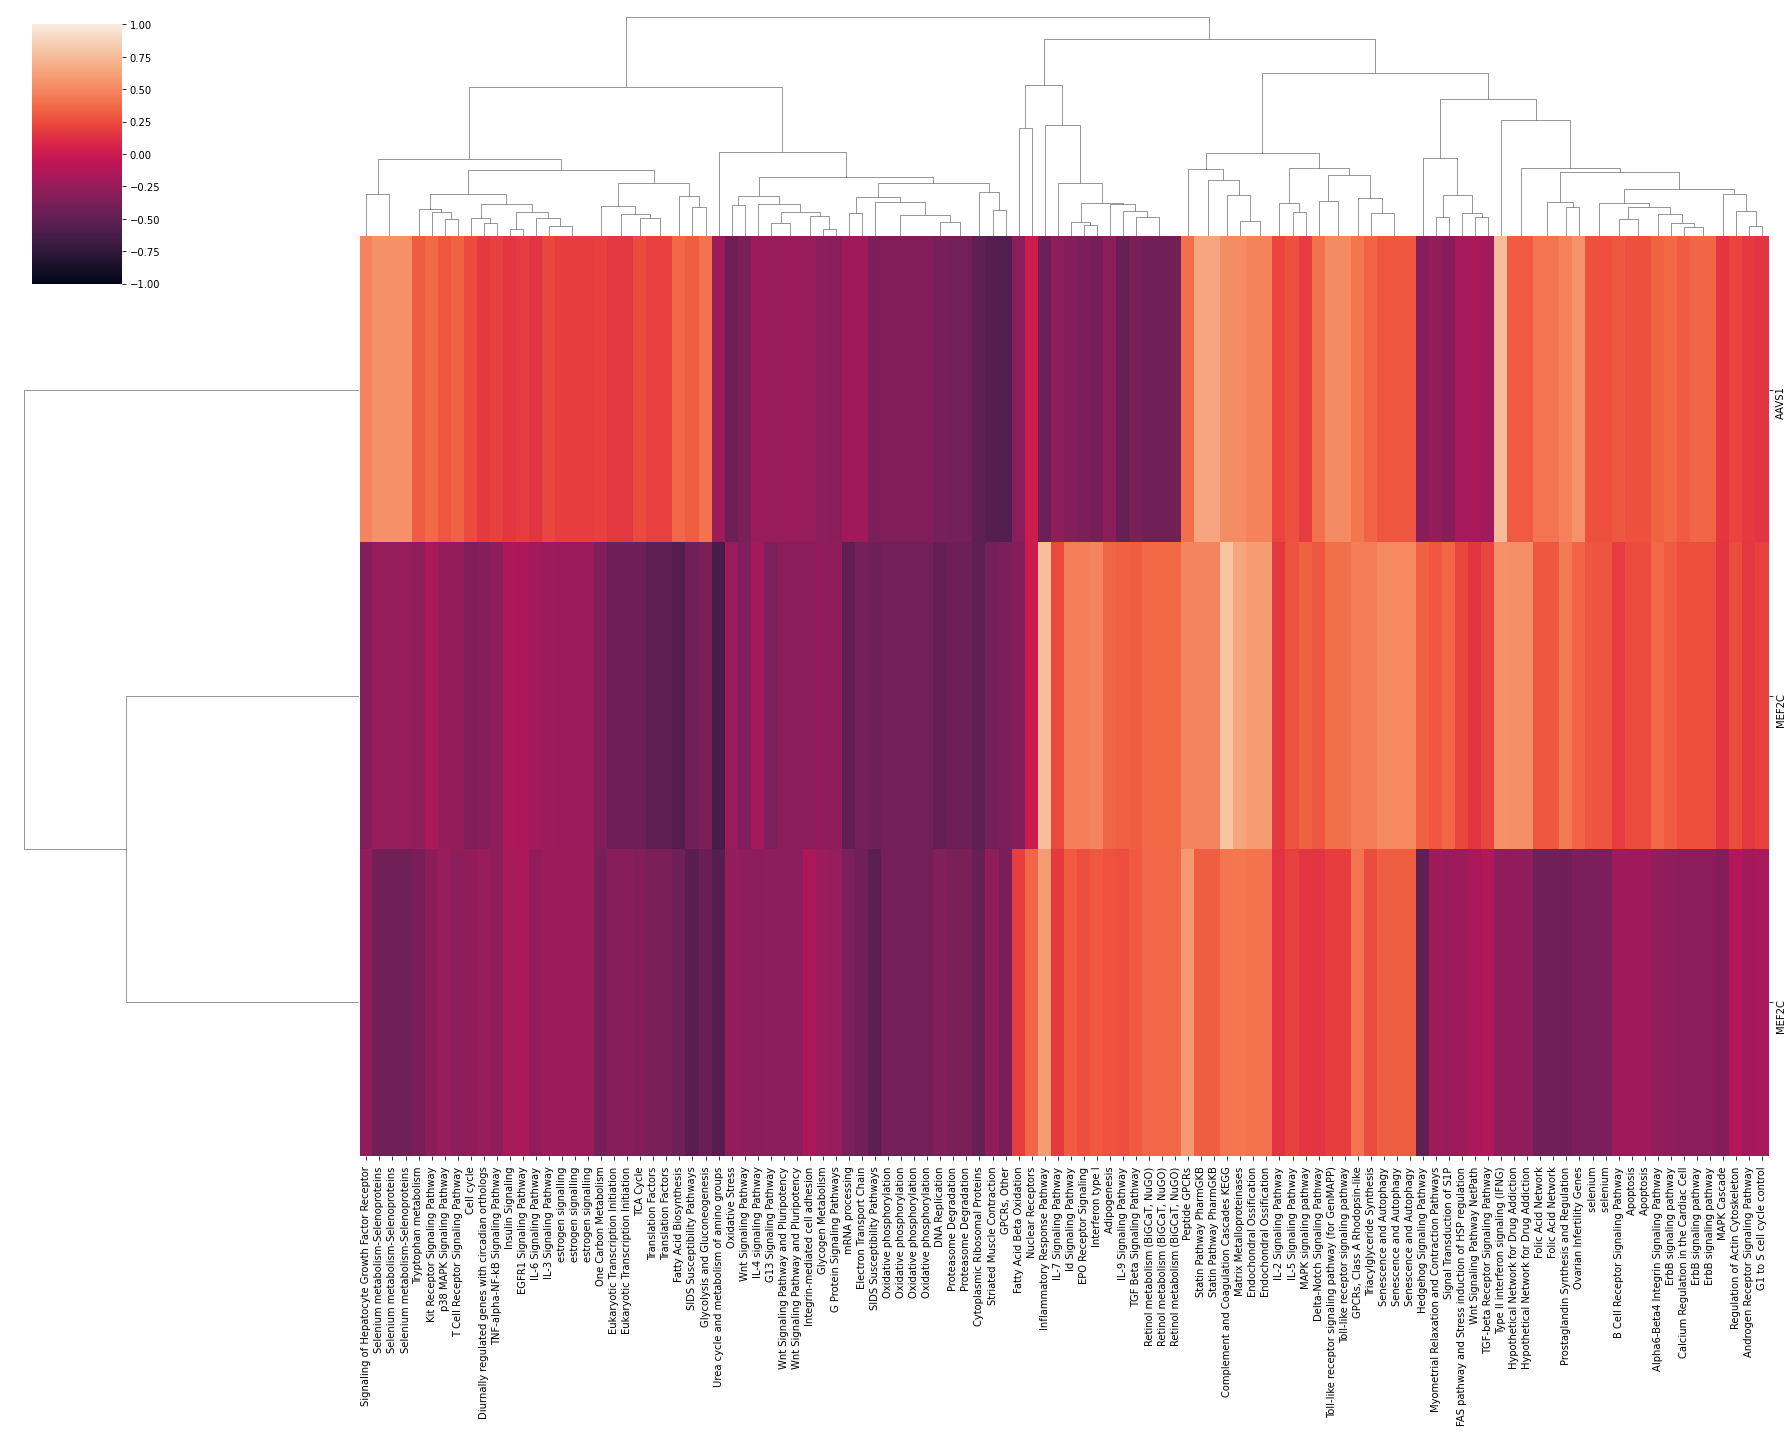

In [168]:
fig = sns.clustermap(figsize=(25,20), data=res,vmin=-1,vmax=1,xticklabels=res.columns, yticklabels=res.index)
fig.savefig("../results/"+project+"/"+version+"enriched_terms_scaled_gsea.pdf")

In [ ]:
res.to_csv('../results/'+project+'/'+version+'_wikipathway_gsea_matrix.csv')

### Analysis on the entire set of pathways (biopathways)

In [ ]:
for i, val in enumerate(experiments):
    print(val)
    totest = data[[v for v in data.columns[:-1] if val+'-' in v or 'AAVS1' in v]]
    cls = ['Condition' if val+'-' in v else 'DMSO' for v in totest.columns]
    if abs(scaling[val.split('_')[1]][0]) > 3*scaling[val.split('_')[1]][1]:
        print("rescaling this one")
        cols = [i for i in totest.columns if val+'-' in i]
        totest[cols] = totest[cols]*(2**scaling[val.split('_')[1]][0])
    elif val in res:
        continue
    res[val] = gseapy.gsea(data=totest, gene_sets='GO_Biological_Process_2015', 
                cls= cls, no_plot=False, processes=8)
    res[val].res2d['Term'] = [i for i in res[val].res2d.index]
    plt.figure(i)
    a = sns.barplot(data=res[val].res2d.iloc[:25], x="es", y="Term",
                hue_order="geneset_size")
    a.set_title(val)
    a.figure.savefig('../results/'+ project+ '/plots/'+version + '_gobioproc2015_mainTerms_'+val+'.pdf')

In [ ]:
with open('../results/'+project+'/'+version+'_GO_Biological_Process_2015_RNPv2', 'wb') as f:
    pickle.dump(res,f)

In [ ]:
with open('../results/'+project+'/'+version+'_GO_Biological_Process_2015_RNPv2', 'wb') as f:
    res = pickle.load(f)

In [ ]:
for i, v in res.items():
    res[i].res2d['Term'] = [i.split('(GO')[0] for i in v.res2d['Term']]

creating matrices

In [ ]:
a = set()
for k, val in res.items():
    a.update(set(val.res2d.Term))
a = {i:[0]*len(res) for i in a}
for n,(k, val) in enumerate(res.items()):
    for i,v in val.res2d.iterrows():
        a[v.Term][n] = v.es
res = pd.DataFrame(a, index=res.keys())

In [ ]:
fig = sns.clustermap(figsize=(25,20), data=res,vmin=-1,vmax=1, yticklabels=res.index ,cmap=plt.cm.RdYlBu)
fig.savefig("../results/"+project+"/"+version+"enriched_terms_scaled_gsea_bioproc2015.pdf")